In [ ]:
import pandas as pd


# dataset created by chatgpt 
data = [
    {
        "name": "Boho Maxi Dress",
        "desc": "Flowy, earthy tones with floral prints perfect for festivals and summer days.",
        "vibes": ["boho", "earthy", "free-spirited"]
    },
    {
        "name": "Urban Street Hoodie",
        "desc": "Bold graphic hoodie with oversized fit, perfect for energetic urban nights.",
        "vibes": ["urban", "energetic", "streetwear"]
    },
    {
        "name": "Classic White Shirt",
        "desc": "Crisp, minimalist white shirt ideal for formal events or a clean daily look.",
        "vibes": ["classic", "minimal", "formal"]
    },
    {
        "name": "Cozy Knit Sweater",
        "desc": "Soft wool sweater for relaxing winter evenings, bringing warmth and comfort.",
        "vibes": ["cozy", "warm", "casual"]
    },
    {
        "name": "Edgy Leather Jacket",
        "desc": "Black leather biker jacket with metallic zippers for a bold, rebellious style.",
        "vibes": ["edgy", "bold", "chic"]
    },
    {
        "name": "Sporty Running Sneakers",
        "desc": "Lightweight sneakers with breathable mesh design for active and energetic vibes.",
        "vibes": ["sporty", "active", "energetic"]
    },
    {
        "name": "Elegant Evening Gown",
        "desc": "Silky red gown with subtle shimmer, made for classy evening events.",
        "vibes": ["elegant", "glamorous", "formal"]
    },
    {
        "name": "Beach Linen Shorts",
        "desc": "Relaxed-fit linen shorts with airy design for summer beach vibes.",
        "vibes": ["casual", "summer", "beachy"]
    },
    {
        "name": "Vintage Denim Jacket",
        "desc": "Retro faded denim jacket with rugged charm for a timeless, relaxed look.",
        "vibes": ["vintage", "relaxed", "retro"]
    },
    {
        "name": "Minimalist Tote Bag",
        "desc": "Clean beige tote with subtle branding, made for everyday minimalist style.",
        "vibes": ["minimal", "modern", "everyday"]
    }
]

df = pd.DataFrame(data)
df


,name,desc,vibes
0,Boho Maxi Dress,"Flowy, earthy tones with floral prints perfect...","[boho, earthy, free-spirited]"
1,Urban Street Hoodie,"Bold graphic hoodie with oversized fit, perfec...","[urban, energetic, streetwear]"
2,Classic White Shirt,"Crisp, minimalist white shirt ideal for formal...","[classic, minimal, formal]"
3,Cozy Knit Sweater,Soft wool sweater for relaxing winter evenings...,"[cozy, warm, casual]"
4,Edgy Leather Jacket,Black leather biker jacket with metallic zippe...,"[edgy, bold, chic]"
5,Sporty Running Sneakers,Lightweight sneakers with breathable mesh desi...,"[sporty, active, energetic]"
6,Elegant Evening Gown,"Silky red gown with subtle shimmer, made for c...","[elegant, glamorous, formal]"
7,Beach Linen Shorts,Relaxed-fit linen shorts with airy design for ...,"[casual, summer, beachy]"
8,Vintage Denim Jacket,Retro faded denim jacket with rugged charm for...,"[vintage, relaxed, retro]"
9,Minimalist Tote Bag,"Clean beige tote with subtle branding, made fo...","[minimal, modern, everyday]"


In [ ]:
import os
import google.generativeai as genai


os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])


In [ ]:
from tqdm import tqdm

def get_gemini_embedding(text: str):
    
    result = genai.embed_content(
        model="gemini-embedding-001",
        content=text
    )
    return result['embedding']

# embeddings for product descriptions
tqdm.pandas()
df['embedding'] = df['desc'].progress_apply(get_gemini_embedding)


100%|██████████| 10/10 [00:04<00:00,  2.29it/s]


In [33]:
df

,name,desc,vibes,embedding
0,Boho Maxi Dress,"Flowy, earthy tones with floral prints perfect...","[boho, earthy, free-spirited]","[0.0074724574, -0.0316554, -0.010458353, -0.06..."
1,Urban Street Hoodie,"Bold graphic hoodie with oversized fit, perfec...","[urban, energetic, streetwear]","[0.017059535, -0.008965313, -0.00322753, -0.05..."
2,Classic White Shirt,"Crisp, minimalist white shirt ideal for formal...","[classic, minimal, formal]","[-0.02811117, 0.0023751531, -0.013119489, -0.0..."
3,Cozy Knit Sweater,Soft wool sweater for relaxing winter evenings...,"[cozy, warm, casual]","[0.00830077, -0.026218474, -0.003397393, -0.07..."
4,Edgy Leather Jacket,Black leather biker jacket with metallic zippe...,"[edgy, bold, chic]","[0.0254104, -0.001274282, 0.015904127, -0.0404..."
5,Sporty Running Sneakers,Lightweight sneakers with breathable mesh desi...,"[sporty, active, energetic]","[0.018263008, 0.0048787245, -0.009468637, -0.0..."
6,Elegant Evening Gown,"Silky red gown with subtle shimmer, made for c...","[elegant, glamorous, formal]","[0.01455696, -0.004531431, 0.011544809, -0.068..."
7,Beach Linen Shorts,Relaxed-fit linen shorts with airy design for ...,"[casual, summer, beachy]","[-0.02784109, -0.022455834, -0.027063306, -0.0..."
8,Vintage Denim Jacket,Retro faded denim jacket with rugged charm for...,"[vintage, relaxed, retro]","[-0.013511568, -0.013018345, -0.011888746, -0...."
9,Minimalist Tote Bag,"Clean beige tote with subtle branding, made fo...","[minimal, modern, everyday]","[-0.0045153117, -0.010379408, -0.016061638, -0..."


In [35]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


In [ ]:
def vibe_matcher(query):
    # Get embedding for the query
    query_emb = genai.embed_content(
        model="gemini-embedding-001",
        content=query
    )['embedding']
    
    # Compute cosine similarity for each product
    # emb is the input parameter - it comes from each row's 'embedding' column in the DataFrame
    # When you use .apply(), pandas passes each embedding one by one to this function
    df['similarity'] = df['embedding'].apply(
        lambda emb: cosine_similarity([query_emb], [emb])[0][0]
    )
    
    # Sort and get top 3
    top3 = df.sort_values('similarity', ascending=False).head(3)
    
    # Return a cleaner table
    return top3[['name', 'desc', 'similarity']]


In [27]:
!pip install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
queries = [
    "energetic urban chic",
    "cozy winter look",
    "bohemian summer vibes"
]
from tabulate import tabulate

for q in queries:
    print(f"\n🔍 Query: {q}")
    result = vibe_matcher(q)
    
    if result is not None and not result.empty:
        print(tabulate(result, headers='keys', tablefmt='pretty', showindex=False))
    else:
        print("⚠️ No strong vibe matches found.\n")





🔍 Query: energetic urban chic
+-------------------------+----------------------------------------------------------------------------------+--------------------+
|          name           |                                       desc                                       |     similarity     |
+-------------------------+----------------------------------------------------------------------------------+--------------------+
|   Urban Street Hoodie   |   Bold graphic hoodie with oversized fit, perfect for energetic urban nights.    | 0.7165869128982766 |
| Sporty Running Sneakers | Lightweight sneakers with breathable mesh design for active and energetic vibes. | 0.6934885115346978 |
|     Boho Maxi Dress     |  Flowy, earthy tones with floral prints perfect for festivals and summer days.   | 0.6115117173403407 |
+-------------------------+----------------------------------------------------------------------------------+--------------------+

🔍 Query: cozy winter look
+-----------------

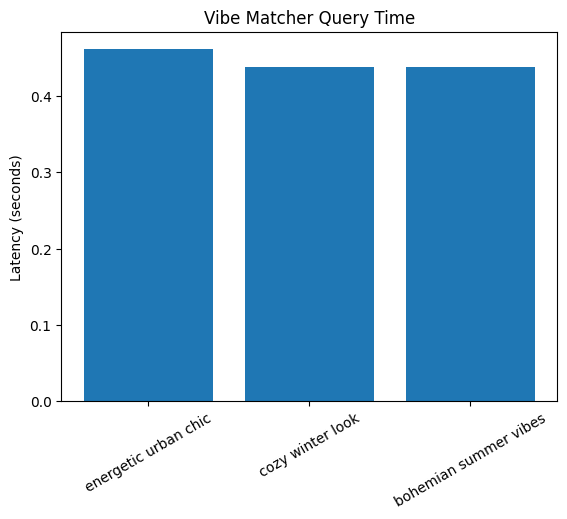

In [39]:
import time
import matplotlib.pyplot as plt

latencies = []

for q in queries:
    start = time.time()
    _ = vibe_matcher(q)
    end = time.time()
    latencies.append(end - start)

# Plot latency per query
plt.bar(queries, latencies)
plt.ylabel("Latency (seconds)")
plt.title("Vibe Matcher Query Time")
plt.xticks(rotation=30)
plt.show()
